In [1]:
from myclasses.sql_executor import SQLExecutor
import pandas as pd

if __name__ == "__main__":
    # Create an instance of SQLExecutor
    sql_executor = SQLExecutor()

    # Example SQL query
    query = """
        SELECT 
            (total_operating_expense * num_beds) as total_operating_expense,
            year,
            tot_fund_balance,
            ownership,
            acct_payable,
            acct_rec,
            total_liabilities,
            current_ratio,
            quick_ratio,
            pct_fixed_assets,
            pct_other_assets,
            (tot_days / tot_bed_days_avail) as fill_rate,
            cash,
            chow_last_12mos,
            region,
            state,
            state_lean,
            county_ssa,
            zip,
            tot_discharge_tot,
            def_score,
            fine_tot,
            fine_cnt,
            resfamcouncil,
            sprinkler_status,
            overall_rating,
            quality_rating,
            staffing_rating,
            rn_staffing_rating,
            aidhrd,
            vochrd,
            rnhrd,
            totlichrd,
            tothrd,
            pthrd,
            weighted_all_cycles_score,
            certification,
            snf_avg_stay_len_title_tot,
            pop_over_70,
            over_70_pct,
            has_outpatient,
            bedcert,
            fac_type,
            staff_style,
            totlichrd_to_tot
            
        FROM Master
        WHERE 
            roa > -1 
            AND roa < 1 
            AND total_assets > 0
            AND total_liabilities > 0 
            AND operating_income < 15000000 
            AND operating_income > -15000000
            AND year <> 2021
        ORDER BY prov_id; 
        """

    # Execute the query and get the result as a DataFrame
    df = sql_executor.execute_query(query)
    
df['year'] = df['year'].astype('str')
    
df.describe()

,total_operating_expense,tot_fund_balance,acct_payable,acct_rec,total_liabilities,current_ratio,quick_ratio,pct_fixed_assets,pct_other_assets,fill_rate,...,rnhrd,totlichrd,tothrd,pthrd,weighted_all_cycles_score,snf_avg_stay_len_title_tot,pop_over_70,over_70_pct,bedcert,totlichrd_to_tot
count,7.182000e+04,7.182000e+04,7.182000e+04,7.182000e+04,7.182000e+04,71820.000000,71820.000000,71820.000000,71820.000000,71820.000000,...,71820.000000,71820.000000,71820.000000,71820.000000,71315.000000,71820.000000,71820.000000,71820.000000,71820.000000,71820.000000
mean,1.025714e+07,2.993859e+04,9.290554e+03,1.981166e+04,1.380831e+05,14.375612,10.484507,0.334499,0.115871,0.868593,...,0.715604,1.579027,3.960450,0.090100,59.458964,2.010030,83564.680841,0.119950,0.965948,0.398158
std,9.439715e+06,2.638341e+05,4.662051e+04,1.058757e+05,6.664083e+05,2209.735421,2089.996372,0.594791,0.567216,3.981397,...,0.395495,0.480530,0.847819,0.096573,68.795504,11.658322,168110.409231,0.030761,1.002618,0.071537
min,3.997400e+04,-1.005025e+07,-9.809024e+04,-3.838471e+05,1.692434e-01,-7359.016509,-7186.550314,-3.467757,-87.187961,0.004452,...,0.000000,0.000000,1.503890,0.000000,0.000000,0.000004,139.000000,0.030065,0.000010,0.000000
25%,5.597896e+06,-2.693873e+03,1.696973e+03,6.660540e+03,9.207658e+03,0.795847,0.008249,0.084443,0.019351,0.715483,...,0.469090,1.302185,3.426410,0.036840,20.667000,0.695851,6241.000000,0.099886,1.000000,0.355666
50%,8.464034e+06,7.338241e+03,3.422112e+03,1.007666e+04,2.101106e+04,1.367797,0.106660,0.208695,0.061524,0.832155,...,0.642130,1.508450,3.813805,0.067780,39.333000,1.179250,22683.000000,0.116642,1.000000,0.395980
75%,1.245721e+07,2.611723e+04,7.063708e+03,1.492750e+04,5.795049e+04,2.511798,0.591376,0.513039,0.154652,0.906983,...,0.871355,1.752320,4.346870,0.112732,72.667000,2.176331,84607.000000,0.134373,1.000000,0.437099
max,2.561539e+08,9.009888e+06,3.165168e+06,7.913870e+06,3.752557e+07,554139.333333,546469.166667,79.378075,7.227777,333.479167,...,8.012500,9.983330,14.745000,3.320740,1442.330000,2987.234623,953730.000000,0.446093,200.000000,1.000005


In [2]:
from sklearn.preprocessing import MinMaxScaler

y = df['total_operating_expense']

# Initialize the scaler
scaler = MinMaxScaler()

# Select numerical columns
quant_cols = df.select_dtypes(include=['number']).columns

# Apply scaling only to the selected numerical columns
df[quant_cols] = scaler.fit_transform(df[quant_cols])

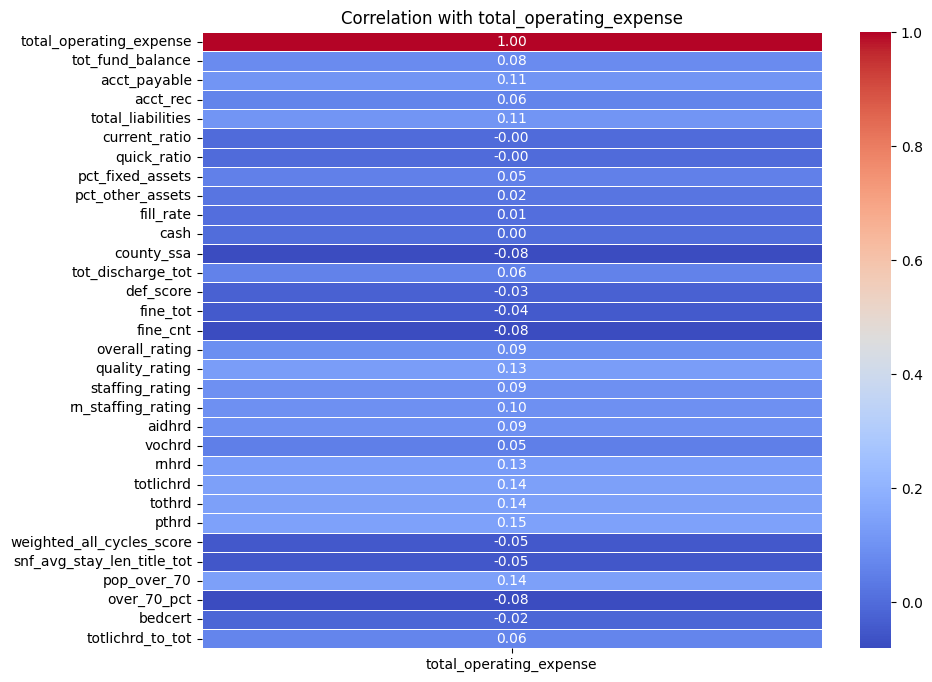

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'operating income' is the name of your y variable
y_variable = 'total_operating_expense'

# Concatenate y and X along the columns axis
data = df.select_dtypes(include=['number'])

# Remove 0 columns
non_zero_columns = data.columns[(data != 0).any()]
data = data[non_zero_columns]

# Compute the correlation matrix
correlation_matrix = data.corr()

# Filter correlations with the y variable
y_correlation = correlation_matrix[y_variable]

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(y_correlation.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title(f'Correlation with {y_variable}')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split


# Select columns where data type is text (object)
text_columns = df.select_dtypes(include=['object']).columns

# Create dummy variables for text columns
df_encoded = pd.get_dummies(df, columns=text_columns)

# Convert all columns to numeric type
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')

# Extract target variable (y) and independent variables (X)
X = df_encoded.iloc[:, 2:]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3
                                                    , random_state=42)

In [5]:
import xgboost as xgb

# Define XGBoost regressor and set hyperparameters
xgb_model = xgb.XGBRegressor(
    booster='gbtree',
    n_estimators=10000,      # Iterations of the model
    learning_rate=0.00525,    # Speed at which the learners optimize
    max_depth=5,            # Depth of the weak learners
    min_child_weight=1, 
    subsample=0.85,
    seed=717,
    colsample_bytree=0.95,
    random_state=42,
    early_stopping_rounds=500,
    eval_metric='rmse',
    objective='reg:squarederror',
    gamma=0.3,              # Increasing this value will make model more conservative
    reg_alpha=0.4,           # Increasing this value will make model more conservative
    reg_lambda=0.3          # Increasing this value will make model more conservative
)

# Train the model with progress printout and early stopping
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],  # Evaluation set for tracking progress
    verbose=100
)

[0]	validation_0-rmse:9237863.36775	validation_1-rmse:9818971.78808
[100]	validation_0-rmse:7098394.20968	validation_1-rmse:7527932.41226
[200]	validation_0-rmse:5837633.63332	validation_1-rmse:6238693.80765
[300]	validation_0-rmse:5111657.49756	validation_1-rmse:5527326.88026
[400]	validation_0-rmse:4602417.95526	validation_1-rmse:5028415.33954
[500]	validation_0-rmse:4235099.36646	validation_1-rmse:4671150.88511
[600]	validation_0-rmse:3958633.05987	validation_1-rmse:4413442.27961
[700]	validation_0-rmse:3748229.82432	validation_1-rmse:4227303.71368
[800]	validation_0-rmse:3578426.16971	validation_1-rmse:4081737.56386
[900]	validation_0-rmse:3442395.24773	validation_1-rmse:3973337.41471
[1000]	validation_0-rmse:3332564.62232	validation_1-rmse:3875268.51081
[1100]	validation_0-rmse:3237640.89703	validation_1-rmse:3796525.74207
[1200]	validation_0-rmse:3148649.61148	validation_1-rmse:3720454.69268
[1300]	validation_0-rmse:3067564.49610	validation_1-rmse:3653107.68688
[1400]	validation_

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.95, device=None, early_stopping_rounds=500,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=0.3, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.00525, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [6]:
import pickle

model_dir = '/home/ehan/Documents/Code/Data-4999/saved-models'

with open(f'{model_dir}/xgb_regression_model_operating_expense.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

In [7]:
import numpy as np
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, mean_squared_error

# Predict on test set
y_pred = xgb_model.predict(X_test)

# R² Score (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)

# Median Absolute Error
mdae = median_absolute_error(y_test, y_pred)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Root Mean Squared Error: {:.2f}".format(rmse))
print("Median Absolute Error: {:.2f}".format(mdae))
print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Absolute Percentage Error: {:.2f}%".format(mape))
print("R² Score (Coefficient of Determination): {:.5f}".format(r2))

Root Mean Squared Error: 2646777.94
Median Absolute Error: 788446.00
Mean Absolute Error: 1382428.41
Mean Absolute Percentage Error: 14.84%
R² Score (Coefficient of Determination): 0.92770


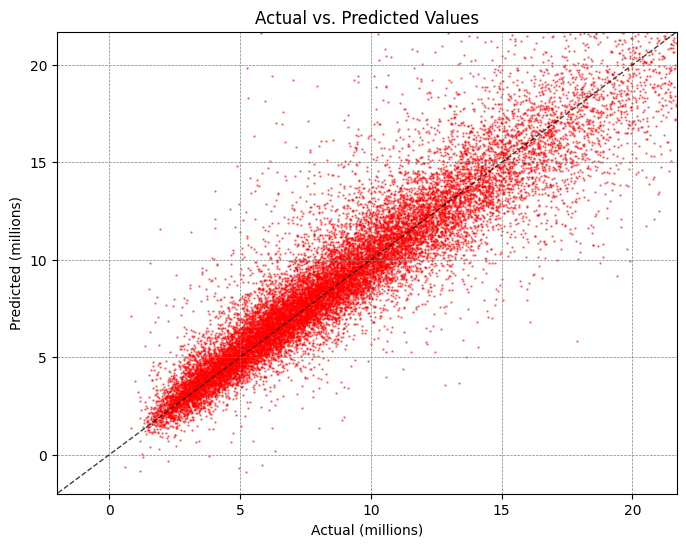

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Convert values to millions
y_test_millions = y_test / 1000000
y_pred_millions = y_pred / 1000000
median_absolute_error_millions = mae / 1000

# Calculate residuals
residuals = y_pred_millions - y_test_millions

# Define colors based on residuals
norm = plt.Normalize(residuals.min(), 400)
colors = ['red']

plt.figure(figsize=(8, 6))
plt.scatter(y_test_millions, y_pred_millions, c=colors, alpha=0.5, s=0.5)

# Calculate the 95th percentile of actual and predicted values
y_test_95th_percentile = np.percentile(y_test_millions, 95)
y_pred_95th_percentile = np.percentile(y_pred_millions, 95)

# Plot the diagonal line
plt.plot([-1500,1500], [-1500,1500], 'k--', lw=1, alpha=0.75)  

plt.xlabel('Actual (millions)')
plt.ylabel('Predicted (millions)')
plt.title('Actual vs. Predicted Values')

# Set axis limits to show the 95th percentile values
plt.xlim(left=-2, right=y_pred_95th_percentile)
plt.ylim(bottom=-2, top=y_pred_95th_percentile)

# Add light gridlines
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()


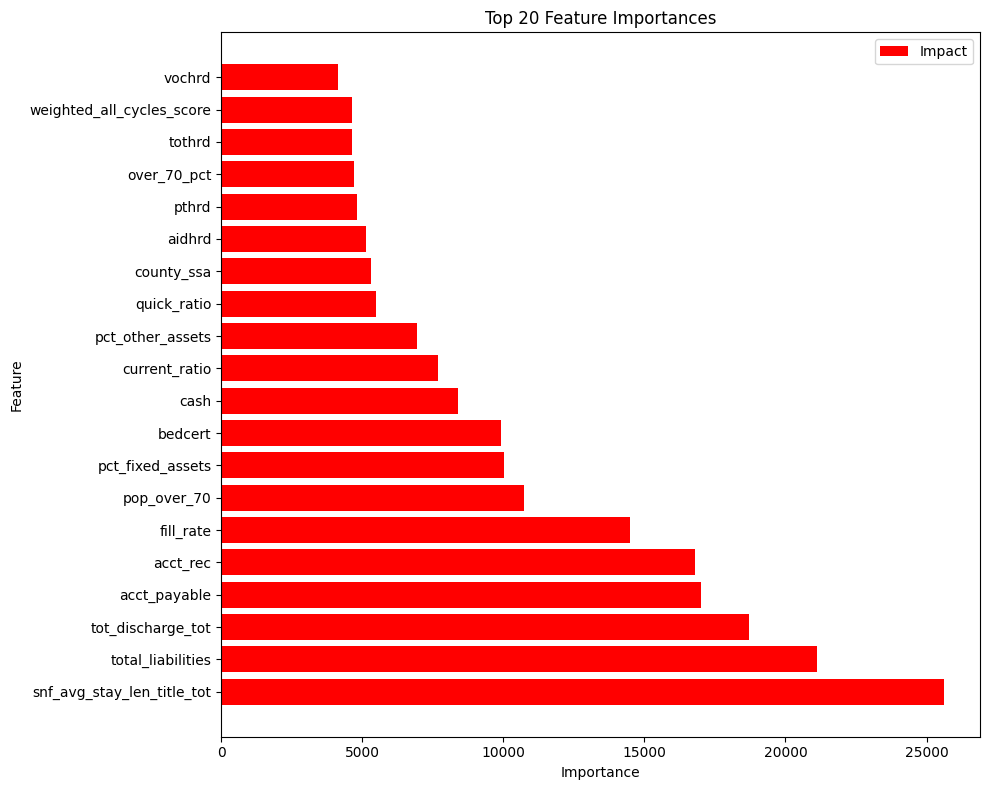

In [9]:
import matplotlib.pyplot as plt

# Get feature importances based on gain
feature_importances  = xgb_model.get_booster().get_score()

# Sort the dictionary by importances in descending order
sorted_feature_importance = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Separate positive and negative importances (since gain is inherently positive)
positive_importances  = dict(sorted_feature_importance)

# Extract feature names and importances
positive_features , positive_importances = zip(*positive_importances.items())

# Select only the top 20 features
top_features  = positive_features [:20]
top_importances  = positive_importances [:20]

# Plot positive importances based on gain for top 20 features
plt.figure(figsize=(10, 8))
plt.barh(top_features , top_importances , color='red', label='Impact')

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Text(0.5, 1.0, 'XGBoost Learning Curve with rmse')

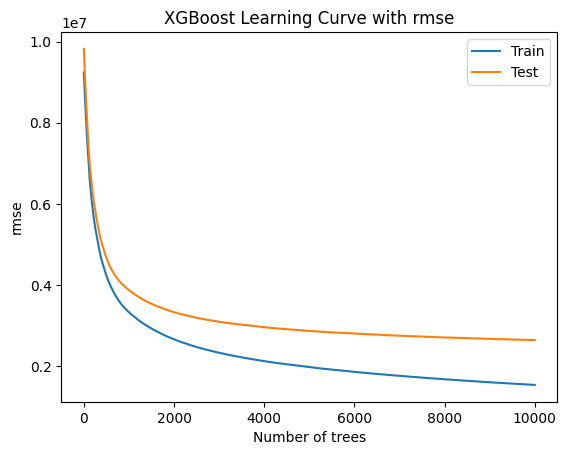

In [10]:
# Get the evaluation results
results = xgb_model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# Plot the learning curve with RSME
plt.plot(x_axis, results['validation_0']['rmse'], label='Train')
plt.plot(x_axis, results['validation_1']['rmse'], label='Test')
plt.legend()
plt.xlabel('Number of trees')
plt.ylabel('rmse')
plt.title('XGBoost Learning Curve with rmse')

In [11]:
import shap

explainer = shap.Explainer(xgb_model)
shap_values = explainer.shap_values(X_train, approximate=True, check_additivity=False)

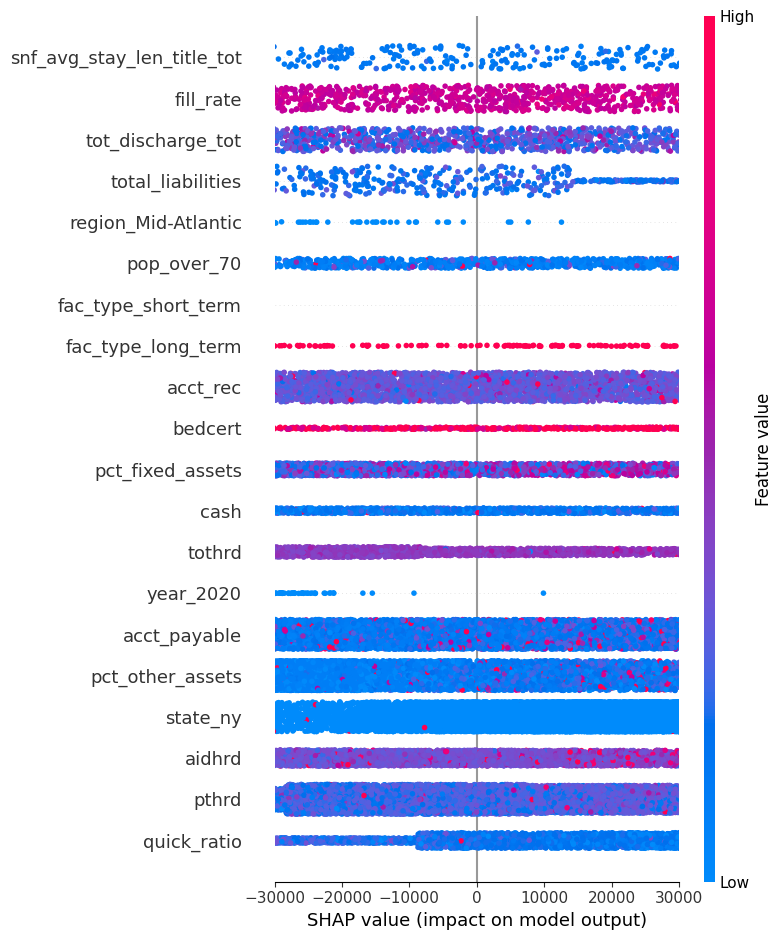

In [12]:
# Find the indices of the top 20 features in the original feature set
top_feature_indices = [X_train.columns.tolist().index(feature) for feature in top_features]

# Select the SHAP values corresponding to the top 20 features
top_shap_values = shap_values[:, top_feature_indices]

# Select only the top 20 features from the training data
top_X_train = X_train.iloc[:, top_feature_indices]

# Calculate shap_values
fig = shap.summary_plot(shap_values, X_train, show=False)
plt.xlim([-30000, 30000])  # Set x-axis limit
plt.show()

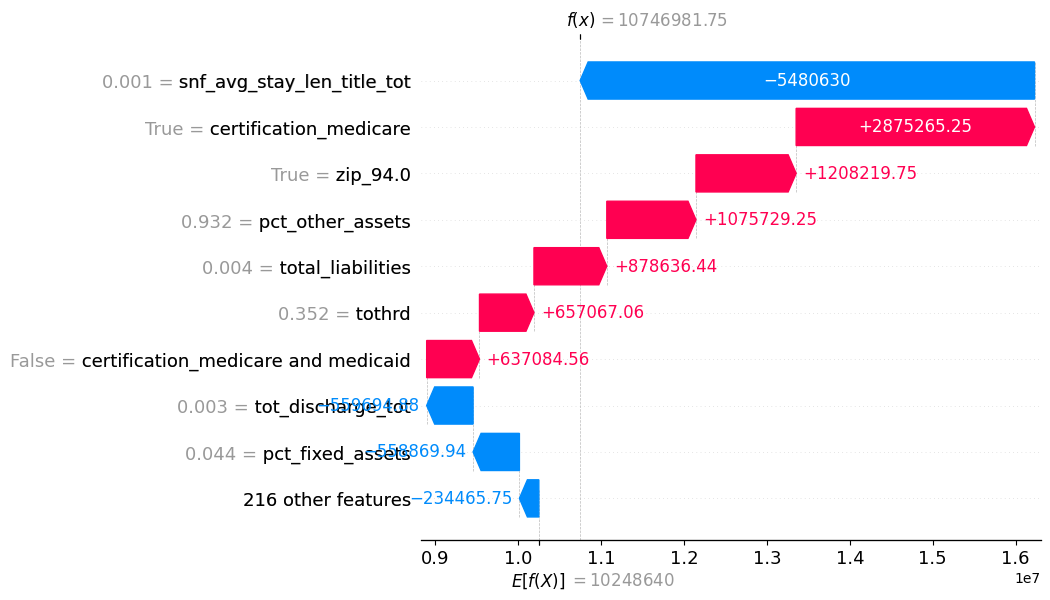

6375700.0


In [13]:
# Select a sample from the dataset (e.g., the first sample)
sample_index = 50
actual = y_train[sample_index]

# Create a waterfall plot for the selected sample
shap.waterfall_plot(shap.Explanation(values=shap_values[sample_index], base_values=explainer.expected_value, data=X_train.iloc[sample_index]), max_display=10)

print(actual)